#Métodos de interpolación

##Interpolación de Lagrange
En nuestro primer programa realizamos la interpolación de lagrange de una serie de datos aleatorios
la interpolación esta definida  como el siguiente sumatorio:

$P_{n}\left( x\right) =\sum ^{n}_{i=0}S\left( x_{i}\right) l_{in}\left( x\right)$


Datos xi
[0.29762084 0.16209924 0.39398508 0.9599649  0.26647059 0.29547401
 0.63628081 0.17855891 0.45021409 0.90619953]
Datos yi
[0.78504471 0.90868333 0.91163344 0.59787511 0.39087771 0.80087969
 0.65820599 0.43891321 0.12897914 0.8883953 ]
Otros Datos
Datos xi
[0.19841951 0.28042101 0.14812155 0.27873382 0.85348916 0.69691601
 0.81804693 0.49106852 0.04351068 0.29634166]
Datos cos xi
[0.98037935 0.960939   0.98905005 0.96140458 0.65735779 0.76682531
 0.68364788 0.88182948 0.99905356 0.95641121]


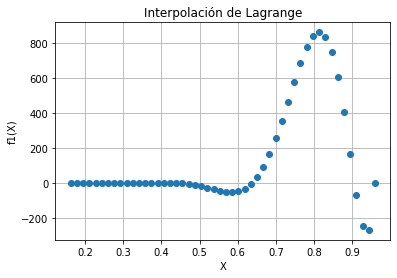

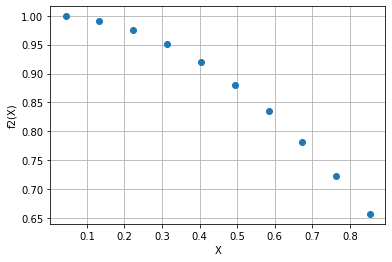

In [40]:
import numpy as np #importamos numpy
import matplotlib.pyplot as plt #importamos pyplot de modulo matplotlib

pu=10 #Numero  de Datos aleatorios
ev1=50 #Evaluacion de los puntos en la primera grafica
ev2=10 #Evaluacion de los puntos en la segunda grafica

datax=np.random.rand(pu) #Datos de Xi
datay=np.random.rand(pu) #Datos de Yi
#Introducimos un otros arrays de datos para hacer otra la grafica
datax2=np.random.rand(pu)
datay2=np.cos(datax2)
#Cabecera para ver los  valores aleatorios
print("Datos xi")
print(datax)
print("Datos yi")
print(datay)
print("Otros Datos")
print("Datos xi")
print(datax2)
print("Datos cos xi")
print(datay2)
#Definimos la interpolacion de Lagrange
def LAGRANGE(a,x,y):
    n=len(x)
    p=0  #valor inicial del polinomio
    for j in range (n):
        l=1 #valor incial del cociente 
        for k in range (n):
            if k != j:
                l=l*((a-x[k])/(x[j]-x[k])) #Cocientes de Lagrange
        p+=l*y[j] #polinomio interpolador
    return p #devuelve el polinomio
  
t=np.linspace(min(datax),max(datax),ev1) #Espacio lineal con 100 puntos 
t2=np.linspace(min(datax2),max(datax2),ev2)
yl=LAGRANGE(t,datax,datay) #Funcion evaluada con los datos de Xi,Yi
yl2=LAGRANGE(t2,datax2,datay2)
#Grafica del polinomio
plt.figure(num=1)
plt.plot(t,yl,"o") #Dibujamos la grafica
plt.title("Interpolación de Lagrange") #Titulo de a grafica
plt.ylabel('f1(X)') #Etiqueta eje x
plt.xlabel('X')  #Etiqueta eje y
plt.grid(True) 
plt.figure(num=2)
plt.plot(t2,yl2,"o") #Titulo de a grafica
plt.ylabel("f2(X)")
plt.xlabel("X")
plt.grid(True)
plt.show() #Mostramos la grafica.



##Interpolación de Newton
Continuamos nuestro programa con la interpolación de Newton este método esta definido  como:

$p_n\left( x\right) =p_{n-1}\left( x\right) +f\left[ x_{n},\ldots ,x_{0}\right] \cdot \prod ^{n-1}_{i=0}\left( x-x_{i}\right)$


Donde  $f\left[ x_{n},\ldots ,x_{0}\right] \ $ son las diferencias divididas  y  $p_{n-1}\left( x\right) $ es el polinomio resultado de la iteración anterior.

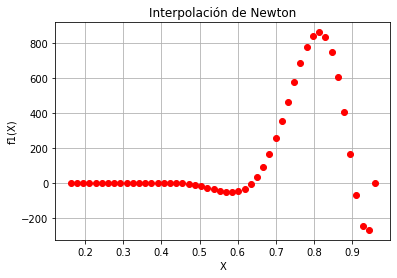

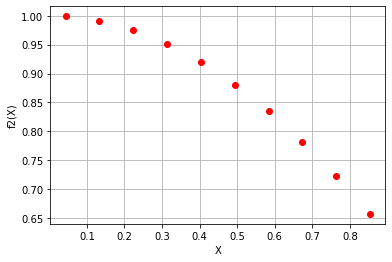

In [41]:

def NEWTONCOEFF(x,y): #Definimos los coeficientes de Newton
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])
    for j in range(1,n):
        for i in range(n-1,j-1,-1):
            a[i] = (a[i]-a[i-1])/(x[i]-x[i-j])
    return np.array(a) 
  
def NEWTON(a,x,y): #Definimos la interpolacion de Newton
    l=NEWTONCOEFF(x,y) 
    n=len(l)-1
    p=l[n]
    for k in range(1,n+1):
        p = l[n-k] + (a -x[n-k])*p #Polinomio de Newton
    return p #Devuelve el polinomio interpolador

 
yn=NEWTON(t,datax,datay) #Interpolacion evaluada con los datos de Xi,Yi
yn2=NEWTON(t2,datax2,datay2)

#Grafica del polinomio
plt.figure(num=1)
plt.plot(t,yn,"o",color="r") 
plt.title("Interpolación de Newton")
plt.ylabel('f1(X)') #Etiqueta eje y
plt.xlabel('X') #Etiqueta eje x
plt.grid(True)
plt.figure(num=2)
plt.plot(t2,yn2,"o",color="r")
plt.ylabel("f2(X)")
plt.xlabel("X")
plt.grid(True)
plt.show() #Mostramos la grafica


##Error en la interpolación de Lagrange y Netwon

Finalmente calculamos el error en la interpolación que viene dado por:

$e\left( x\right) =f\left( x\right) -p_{n}\left( x\right)=\dfrac {\left( x-x_{0}\right) \left( x-x_{1}\ \right) \ldots \left( x-x_{n}\right) }{\left( 1+\eta \right) !} f^{\left( n+1\right) }_{\left( \xi x\right) }$

Donde  hemos aproximado la derivada de orden $m=n+1$ por diferencias divididas:

$\left[ x_{m},\ldots ,x_{0}\right] =\dfrac{ f^{\left( m\right) }_{\left( \xi \right) }}{\left( m\right) !}$

 


[ 7.85044706e-01 -9.12316734e-01  9.59940177e+00 -1.55661617e+01
  1.33883971e+03 -7.75511740e+04  2.17403712e+05  1.93205334e+06
 -1.22917745e+07  2.00857106e+07]
[ 9.80379348e-01 -2.37073030e-01 -4.88939089e-01  3.74040397e-02
  3.89042216e-02 -3.29937839e-03 -1.23343927e-03  8.96146775e-05
  2.25217136e-05 -1.07529996e-06]


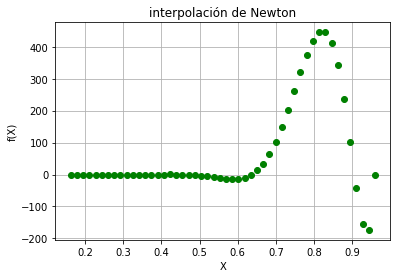

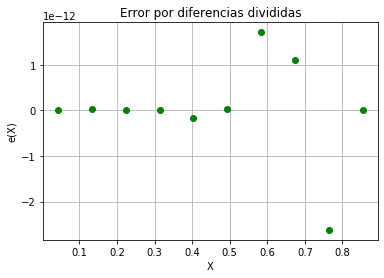

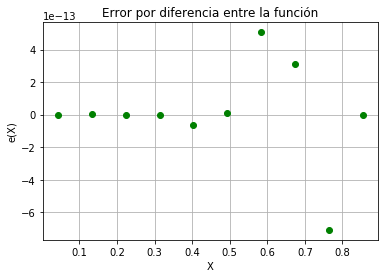

In [49]:
#Definimos el error en la interpolación
def ERRORINT(a,x,y):
  m=len(y)
  l=1
  coeff=NEWTONCOEFF(x,y)
  print(coeff)
  for k in range(0,m):
    l=l*(a-x[k-1]) #aproximacion a una derivada por diferencias divididas.
    e=coeff[k]*l #Coeficientes del error
  return e #Devuelve el error de interpolacion
 
ye=ERRORINT(t,datax,datay) #Error a partir de las xi y yi
ye2=ERRORINT(t2,datax2,datay2)
yed=np.cos(t2)-(yn2)
#Grafica del error
plt.figure(num=1)
plt.plot(t,ye,"o",color="g")
plt.title("interpolación de Newton")
plt.xlabel("X") #Etiqueta eje X
plt.ylabel("f(X)") #Etiqueta eje Y
plt.grid(True)  #Mostramos la grafica
plt.show()
plt.figure(num=2)
plt.plot(t2,ye2,"o",color="g")
plt.title("Error por diferencias divididas")
plt.xlabel("X") #Etiqueta eje X
plt.ylabel("e(X)") #Etiqueta eje Y
plt.grid(True)
plt.figure(num=3)
plt.plot(t2,yed,"o",color="g")
plt.title("Error por diferencia entre la función")
plt.xlabel("X") #Etiqueta eje X
plt.ylabel("e(X)") #Etiqueta eje Y
plt.grid(True)
plt.show()

##Conclusiones

Al obtener las mismas graficas tanto por el  método
de Lagrange como por el de Newton concluimos que ambas implementaciones son correctas.

En cuanto al estudio del error entre el calculo exacto por la diferencia de funciones y la aproximación de las diferencias divididas existe una pequeña diferencia probablemente debida a la aproximación de la derivada de orden n+1.

